In [7]:
###
#Demo analysis of the clustering package.
#Within the package, the following algorithms have been implemented:
#
#        - Standard K-Means (KM): 
#            Subcase of KKM with a linear kernel.
#        
#        - Kernel k-Means (KKM): 
#            Clusters in feature space.          
#        
#        - Global Kernel k-Means (GKKM): 
#            kKM with a local search to define initial cluster positions.
#            
#        - Global Kernel k-Means with Convex Mixture Models (GKKM-CMM):
#            optimized boosted version of GkKM to reduce complexity.
#            
#        - Adaptive Weights Clustering (AWC): 
#            A type of adaptive nonparametric clustering.	    
#            
#The present demo evaluates the algorithms performance on the
#Shape sets and the UCI datasets lists on the Clustering benchmark datasets page:
#    
#        - https://cs.joensuu.fi/sipu/datasets/
#
###

# Author: Francesco Casola <fr.casola@gmail.com>

In [13]:
# importing the clustering package (personal one) 
import sys
path_pc = r"../"
sys.path.append(path_pc)
# importing personal package
import clustering as cl

In [19]:
# importing pandas and other modules to handle datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# os functionalities
import os
#evaluate NMI using the definition in the Efimov paper
from sklearn.metrics import normalized_mutual_info_score as NMI

In [15]:
###
#PART I: The Shape Set
#
#n_samples: from 240 to 3100
#n_features: 2
#n_clusters: from 2 to 31
###

In [16]:
#1 - Loading dataset
path = r"../data/Shape_Set"
#dictionary of a set of dataframes
set_dataframes = {}
#gathering and loading fles
for fname in os.listdir(path):
    if fname.endswith('.txt'):
        local_fname = os.path.join(path,fname).replace("\\","/")
        set_dataframes[fname.strip('.txt')] = pd.read_csv(local_fname,delimiter='\t', lineterminator='\n', \
                                           names = ["X", "Y", "Labels"])

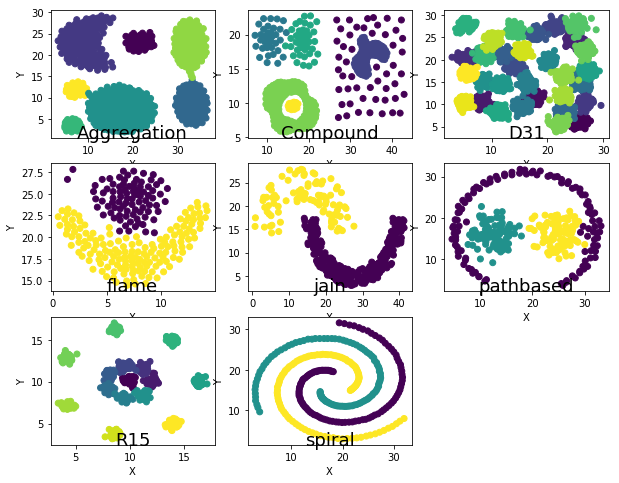

In [20]:
#2 - plotting dataset
#dataset names
dts_names = list(set_dataframes.keys())
#dataset size
dt_size = len(dts_names)
#approximating to nearest bigger square
perf_sq = np.arange(1,100)
id_plots = np.where(perf_sq**2>=dt_size)[0]
n_plots = perf_sq[id_plots[0]]

#making the plot
plt.figure(num=1,figsize=(10,8))
for i in range(1, n_plots**2):
    plt.subplot(n_plots, n_plots, i) 
    ax = plt.scatter(set_dataframes[dts_names[i-1]]["X"], \
                 set_dataframes[dts_names[i-1]]["Y"], \
                 c=set_dataframes[dts_names[i-1]]["Labels"])
    loc_ax = np.array(plt.axis())
    plt.text(np.mean(loc_ax[:2]),loc_ax[2], dts_names[i-1],
             fontsize=18, ha='center')    
    plt.xlabel("X")
    plt.ylabel("Y")

In [ ]:
#3- running partitional algorithms and using evaluating metrics
# Elbow plots will be generated with and without data normalization

#run KKM with and without data normalization
#initializing lists of fitted datasets
KKM_no_norm_labels = {}
KKM_norm_labels = {}
sigma_val_no_norm = [1,3,5,7]
sigma_val_norm = [0.05,0.2,0.3,0.5]

print("KKM algorithm.")
for i in dts_names:
    #starting the loop
    print("Considering the %s dataset"%i)
    #initializing datasets
    KKM_no_norm_labels[i] = []
    KKM_norm_labels[i] = []
    #getting the dataset: NO normalization
    XX = set_dataframes[i].as_matrix(columns=["X","Y"])
    #getting the dataset: normalized
    XX_norm = (XX - XX.mean(axis=0))/(XX.std(axis=0)+sys.float_info.epsilon)    
    
    for sigma in range(len(sigma_val_no_norm)):    
        print("Kernel variance %3.2f (non-norm.), %3.2f (norm.)"%(sigma_val_no_norm[sigma],sigma_val_norm[sigma]))
        #initialize the classes
        KKM_means = cl.Cluster_class(algorithm="KKM",verbose=0, \
                                     sigm_gauss=sigma_val_no_norm[sigma])
        KKM_means_norm = cl.Cluster_class(algorithm="KKM",verbose=0, \
                                          sigm_gauss=sigma_val_norm[sigma])
        #starting the clustering: NO normalization
        print("Non-normalized dataset")
        KKM_means.fit(XX)
        #save
        KKM_no_norm_labels[i].append([KKM_means.labels_,KKM_means.cluster_error_])
        #starting the clustering: normalized
        print("Normalized dataset")
        KKM_means_norm.fit(XX_norm)
        #save    
        KKM_norm_labels[i].append([KKM_means_norm.labels_,KKM_means_norm.cluster_error_])